In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

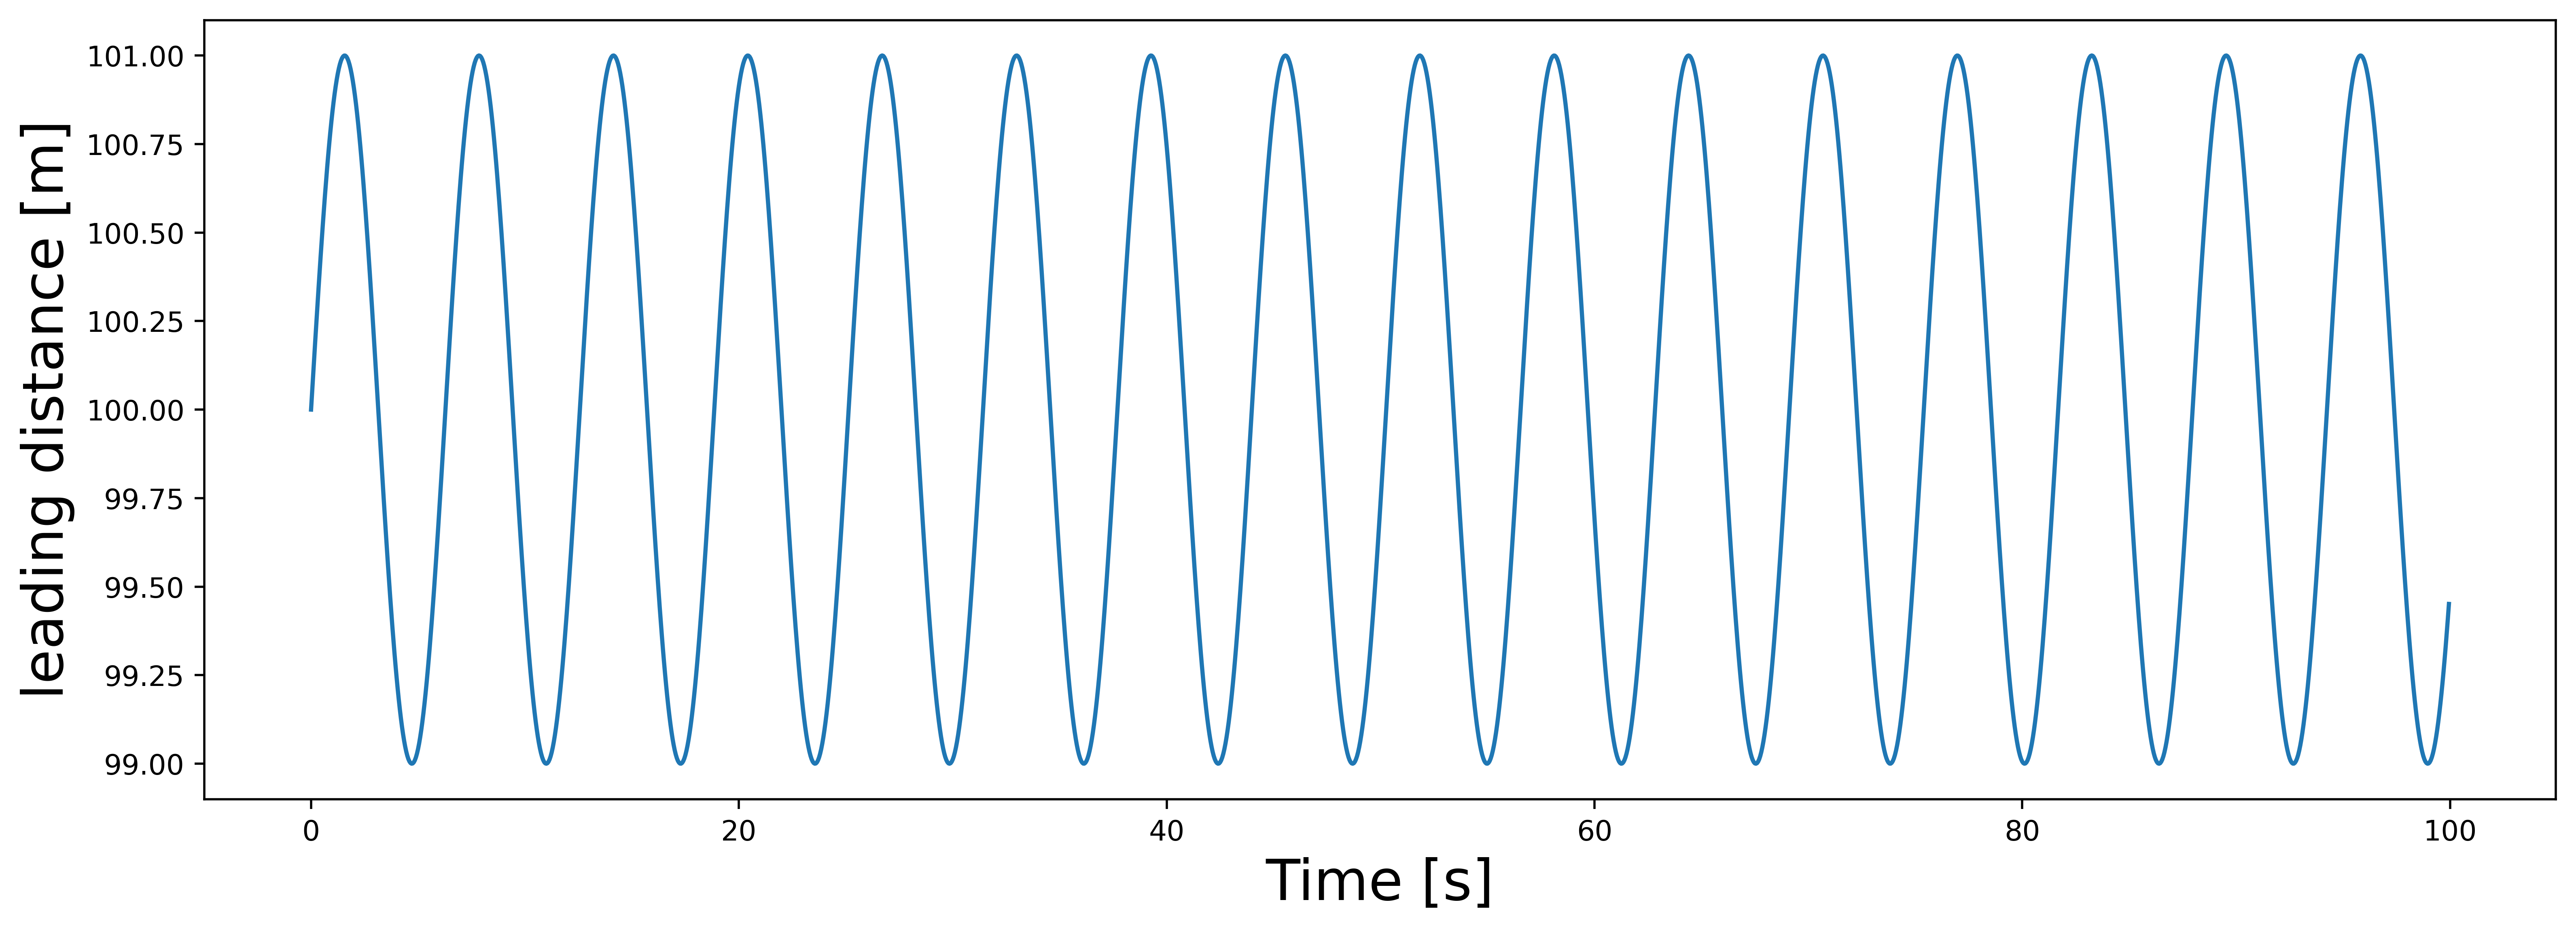

In [74]:
dt = 0.05 #Simulation fidelity
t_final = 100.0 #simulation duration
t = np.arange(0,t_final,dt) #time values
K = len(t) # number of simulation steps

leading_dist_values = np.sin(t) + 100.0 # the lead vehicle oscilates around 20 m/s

plt.figure(figsize=[15,5]) #make the figure aspect ratio wide
plt.plot(t,leading_dist_values)
_ = plt.ylabel('leading distance [m]',fontsize=20)
_ = plt.xlabel('Time [s]',fontsize=20)

In [75]:
def merge_control(k1, k2, k3, hdw, v_0, dist_target, dt, leading_dist_values):
    dist_values = []
    v_values = []
    acc_values = []
    v_values.append(v_0)
    v_desire = k3 * v_0
    N = len(leading_dist_values)
    i=0
    while (i<N):
        dist = min(dist_target,leading_dist_values[i])
        dist_values.append(dist)
        acc = k1 * (dist_values[-1] - hdw * v_values[-1]) + k2 * (v_desire - v_values[-1])
        acc_values.append(acc)
        v = acc * dt + v_values[-1]
        v_values.append(v)
        i += 1
    return dist_values,v_values,acc_values

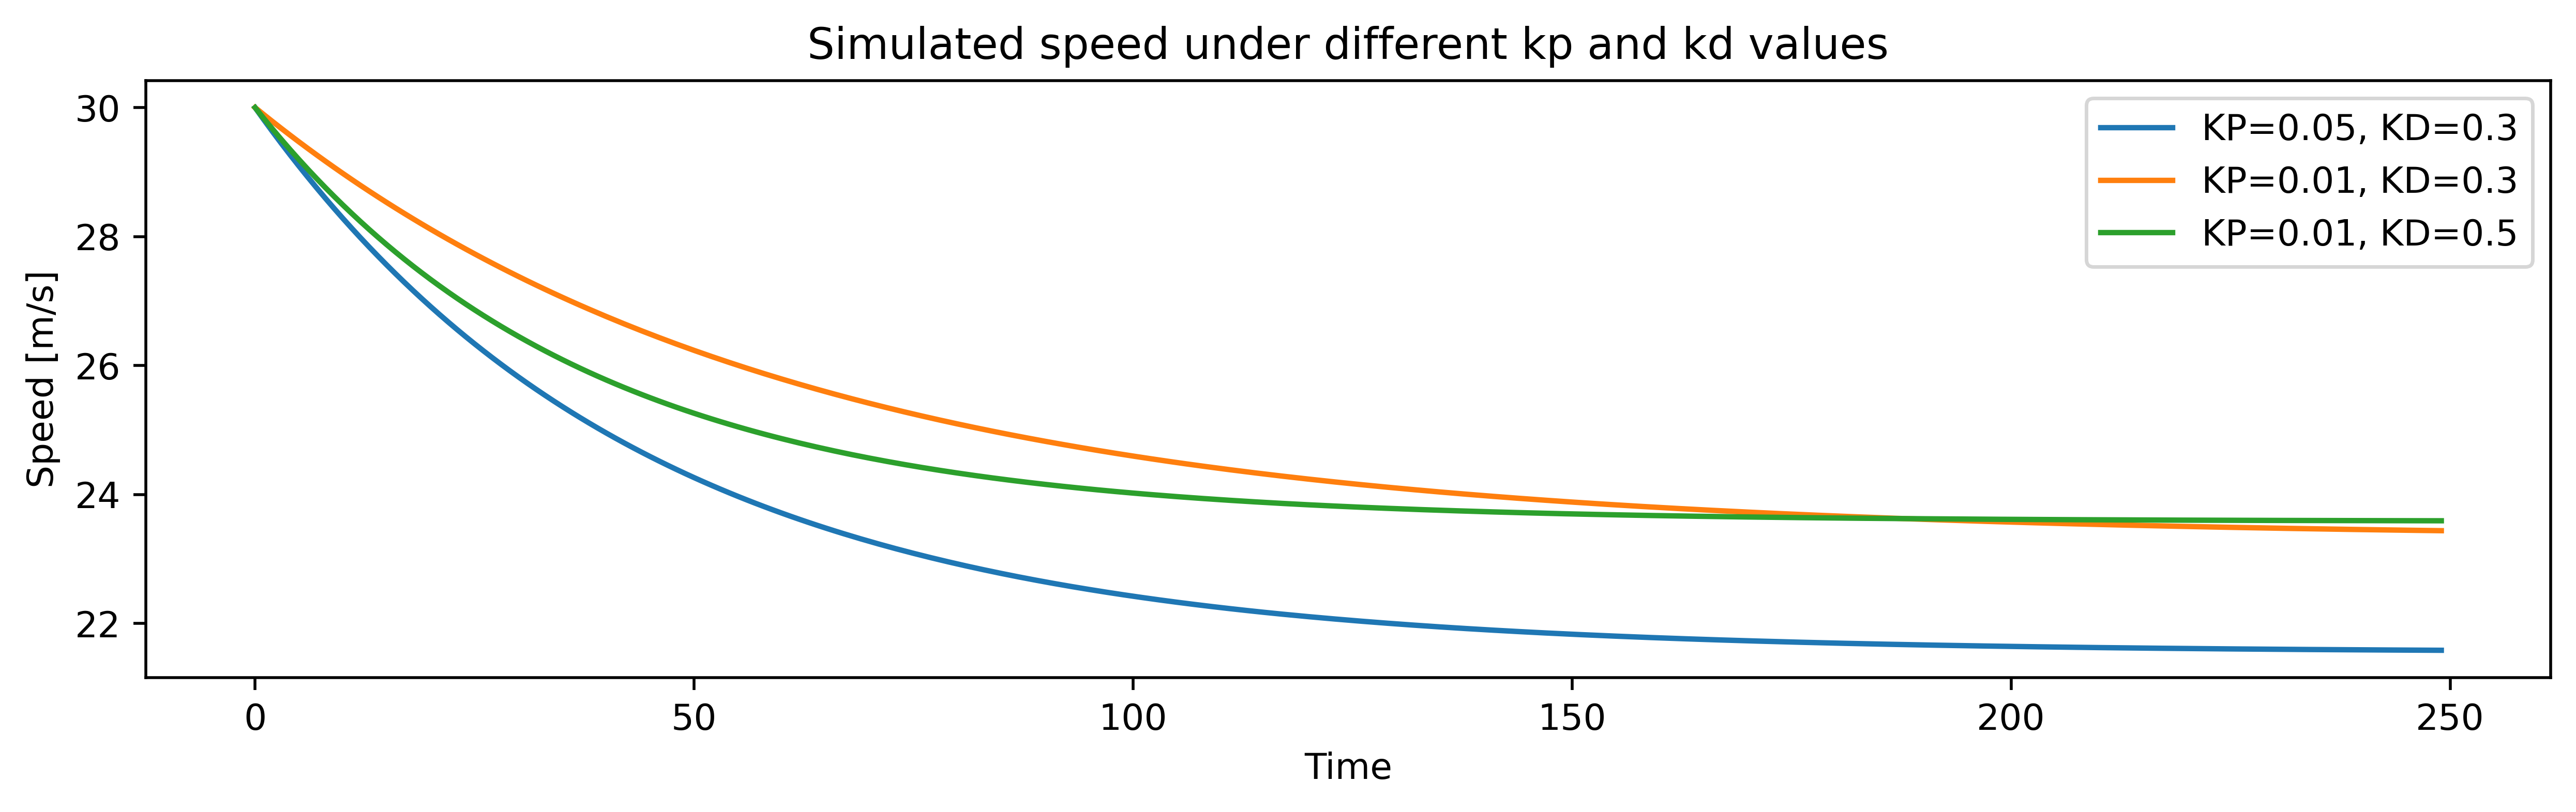

In [78]:
# Set the initial conditions
initial_conditions = [0.8, 3, 30, 50, 0.05]  # Initial position and velocity

# Set the gain parameters KP and KD
KP_values = [0.05, 0.01, 0.01]  # Example values
KD_values = [0.3, 0.3, 0.5]  # Example values

# Simulate the system for different KP and KD values
for kp, kd in zip(KP_values, KD_values):
    dist_values,v_values,acc_values = merge_control(kp,kd,initial_conditions[0],initial_conditions[1],initial_conditions[2],initial_conditions[3],initial_conditions[4],leading_dist_values)
    plt.plot(v_values[:250],label=f'KP={kp}, KD={kd}')
plt.title("Simulated speed under different kp and kd values")
plt.xlabel('Time')
plt.ylabel('Speed [m/s]')
plt.legend()
plt.show()

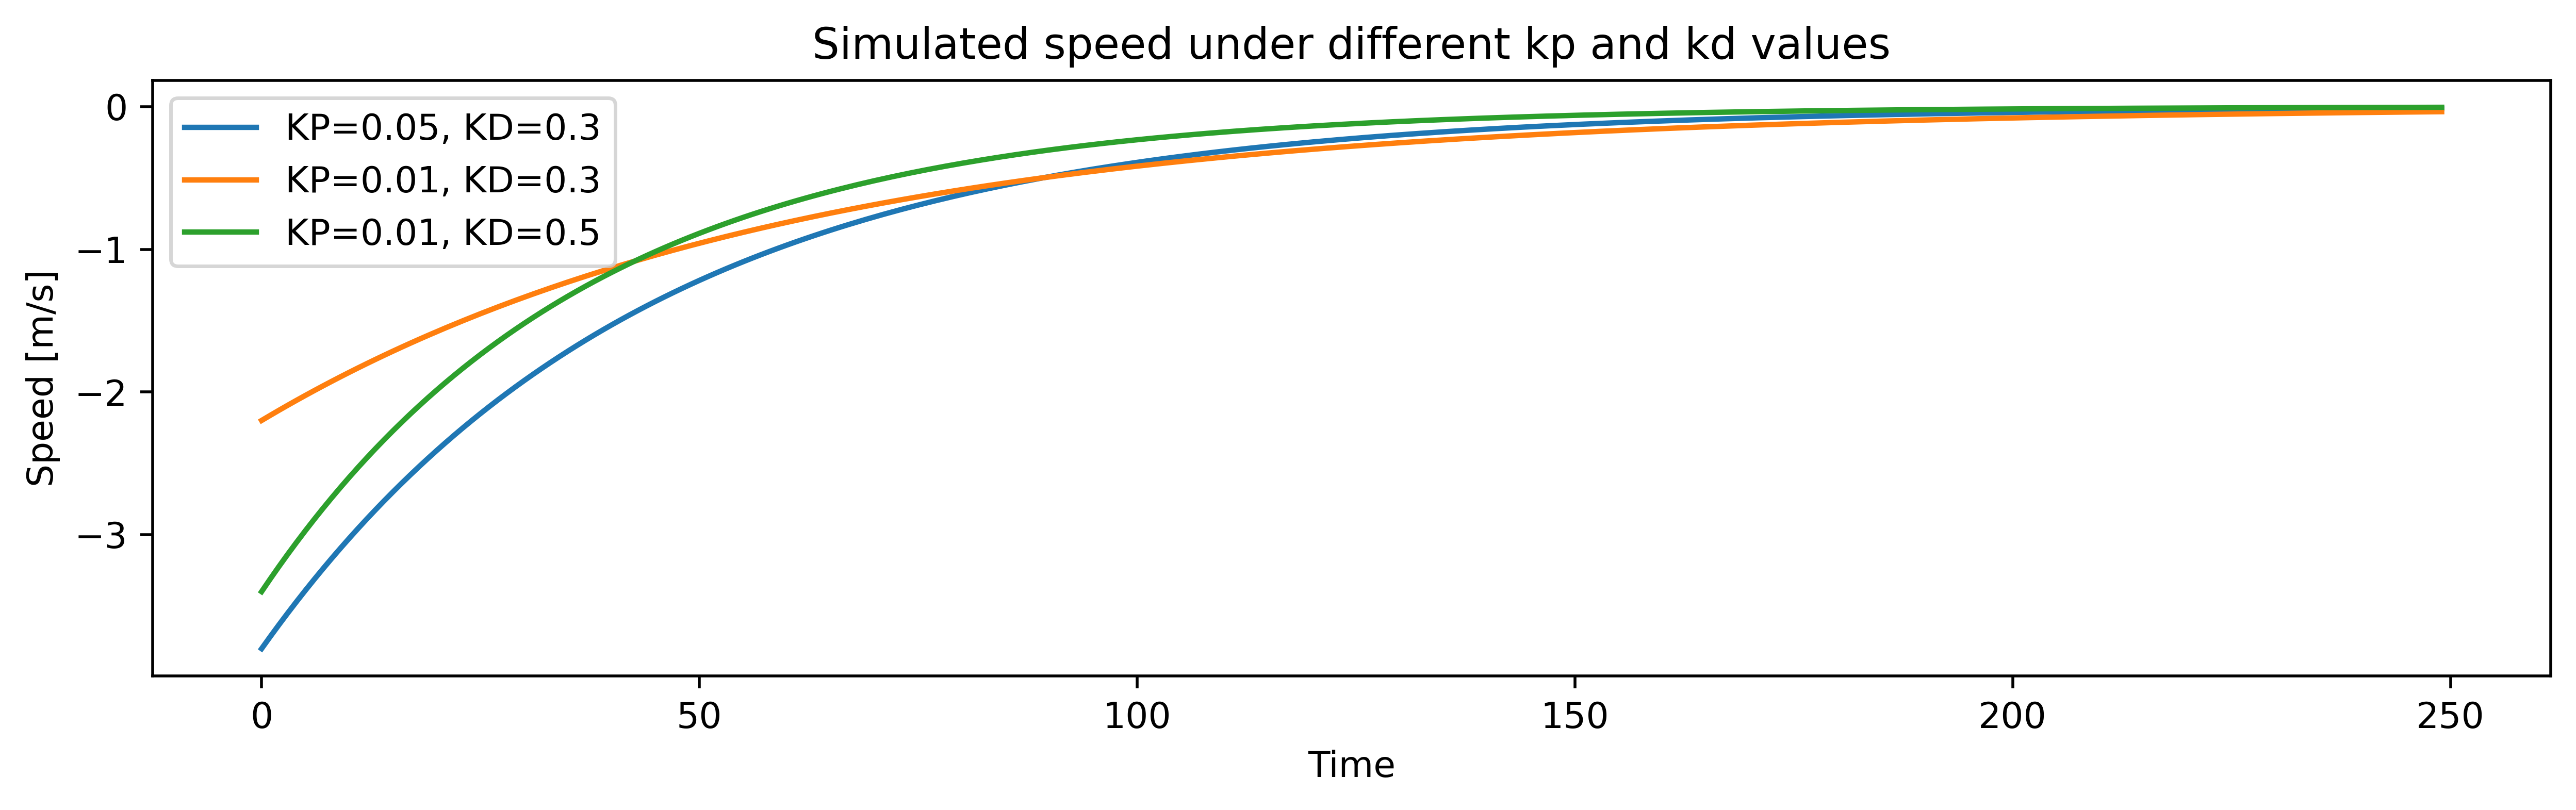

In [79]:
# Set the initial conditions
initial_conditions = [0.8, 3, 30, 50, 0.05]  # Initial position and velocity

# Set the gain parameters KP and KD
KP_values = [0.05, 0.01, 0.01]  # Example values
KD_values = [0.3, 0.3, 0.5]  # Example values

# Simulate the system for different KP and KD values
for kp, kd in zip(KP_values, KD_values):
    dist_values,v_values,acc_values = merge_control(kp,kd,initial_conditions[0],initial_conditions[1],initial_conditions[2],initial_conditions[3],initial_conditions[4],leading_dist_values)
    plt.plot(acc_values[:250],label=f'KP={kp}, KD={kd}')
plt.title("Simulated speed under different kp and kd values")
plt.xlabel('Time')
plt.ylabel('Speed [m/s]')
plt.legend()
plt.show()

In [80]:
dist_values,v_values,acc_values = merge_control(0.01, 0.3, 0.8, 3, 30, 50, 0.05, leading_dist_values)

In [81]:
min(v_values),max(v_values)

(23.33333333333344, 30)

In [82]:
min(acc_values),max(acc_values)

(-2.1999999999999997, -3.47499806707674e-14)